<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/assignment4/Assignment4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/DataSets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# List of variables to map, yes/no variables to 0/1 variables

varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the housing list
cancer[varlist] = cancer[varlist].apply(binary_map)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Checking Null values
cancer.isnull().sum()*100/cancer.shape[0]
# There are no NULL values in the dataset, hence it is clean.

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [6]:
# Generate a list of integer positions for the columns you want to select
selected_columns_indices = [i for i in range(2,32)]  # Selects the first 30 columns
print(selected_columns_indices)
X = cancer.iloc[:, selected_columns_indices].values
#M = 1, E = 0
Y = cancer.iloc[:, 1].values

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [7]:
Y[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#df_train = training set, #df_test = testset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


In [9]:
from sklearn.preprocessing import StandardScaler
#scale dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Create a PCA instance and specify the number of components to retain
from sklearn.decomposition import PCA
from sklearn import metrics
#Linear Support vector classifier
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E3)

recalls = []
accuracies = []
precisions = []
f1_scores = []
n_components = 30  # number of components
for element in range(1,n_components):
  pca = PCA(n_components=element)
  # Fit PCA on the scaled data and transform it
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.fit_transform(X_test)
  model.fit(X_train_pca, Y_train)
  Y_pred = model.predict(X_test_pca)
  #append to lists
  recalls.append(metrics.recall_score(Y_test, Y_pred))
  accuracies.append(metrics.accuracy_score(Y_test, Y_pred))
  precisions.append(metrics.precision_score(Y_test, Y_pred))
  f1_scores.append(metrics.f1_score(Y_test, Y_pred))
  #printing the results
  print("Elements: ", element)
  print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
  print("Precision:",metrics.precision_score(Y_test, Y_pred))
  print("Recall:",metrics.recall_score(Y_test, Y_pred))
  print("F1:",metrics.f1_score(Y_test, Y_pred))

print("-----------")
#maximum accuracy and its index
high_acc = max(accuracies)
high_acc_k=accuracies.index(max(accuracies))+1
print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))

Elements:  1
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1: 0.8842105263157894
Elements:  2
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1: 0.8842105263157894
Elements:  3
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1: 0.8842105263157894
Elements:  4
Accuracy: 0.9210526315789473
Precision: 0.9318181818181818
Recall: 0.8723404255319149
F1: 0.9010989010989012
Elements:  5
Accuracy: 0.9122807017543859
Precision: 0.8490566037735849
Recall: 0.9574468085106383
F1: 0.9
Elements:  6
Accuracy: 0.9122807017543859
Precision: 0.8627450980392157
Recall: 0.9361702127659575
F1: 0.8979591836734694
Elements:  7
Accuracy: 0.9122807017543859
Precision: 0.8627450980392157
Recall: 0.9361702127659575
F1: 0.8979591836734694
Elements:  8
Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 0.9361702127659575
F1: 0.9072164948453608
Elements:  9
Accuracy: 0.9122807017543859
Precision: 0.8627450980392157
Recall: 0.9361702127

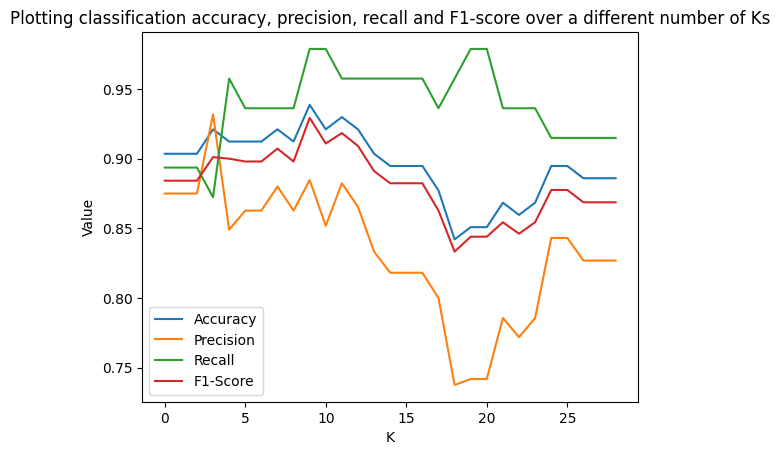

In [11]:
# 4. Plotting over number of elements in PCA
plt.plot(accuracies, label = "Accuracy")
plt.plot(precisions, label = "Precision")
plt.plot(recalls, label = "Recall")
plt.plot(f1_scores, label = "F1-Score")
plt.legend()
plt.title('Plotting classification accuracy, precision, recall and F1-score over a different number of Ks')
plt.ylabel('Value')
plt.xlabel('K')
plt.show()

In [12]:

#different Kernels
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', C=1e3, gamma=0.1)
svm_lin = SVC(kernel='linear', C=1e3)
svm_poly = SVC(kernel='poly', C=1e3, degree=2)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

svm_rbf.fit(X_train_pca, Y_train)
svm_lin.fit(X_train_pca, Y_train)
svm_poly.fit(X_train_pca, Y_train)

Y_pred_rbf = svm_rbf.predict(X_test_pca)
Y_pred_lin = svm_lin.predict(X_test_pca)
Y_pred_poly = svm_poly.predict(X_test_pca)

print("Accuracy rbf:",metrics.accuracy_score(Y_test, Y_pred_rbf))
print("Precision rbf:",metrics.precision_score(Y_test, Y_pred_rbf))
print("Recall rbf:",metrics.recall_score(Y_test, Y_pred_rbf))
print("F1 rbf:",metrics.f1_score(Y_test, Y_pred_rbf))

print("Accuracy lin:",metrics.accuracy_score(Y_test, Y_pred_lin))
print("Precision lin:",metrics.precision_score(Y_test, Y_pred_lin))
print("Recall lin:",metrics.recall_score(Y_test, Y_pred_lin))
print("F1 lin:",metrics.f1_score(Y_test, Y_pred_lin))

print("Accuracy poly:",metrics.accuracy_score(Y_test, Y_pred_poly))
print("Precision poly:",metrics.precision_score(Y_test, Y_pred_poly))
print("Recall poly:",metrics.recall_score(Y_test, Y_pred_poly))
print("F1 poly:",metrics.f1_score(Y_test, Y_pred_poly))

Accuracy rbf: 0.8947368421052632
Precision rbf: 0.8431372549019608
Recall rbf: 0.9148936170212766
F1 rbf: 0.8775510204081632
Accuracy lin: 0.9385964912280702
Precision lin: 0.8846153846153846
Recall lin: 0.9787234042553191
F1 lin: 0.9292929292929293
Accuracy poly: 0.6052631578947368
Precision poly: 0.5217391304347826
Recall poly: 0.5106382978723404
F1 poly: 0.5161290322580645


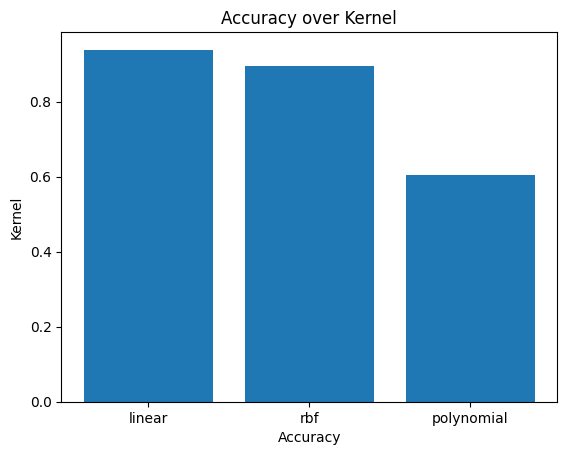

In [13]:
# Plotting accuarcy over different kernels
kernels = ['linear', 'rbf', 'polynomial']
accuarcies = [metrics.accuracy_score(Y_test, Y_pred_lin), metrics.accuracy_score(Y_test, Y_pred_rbf), metrics.accuracy_score(Y_test, Y_pred_poly)]

# Create a bar plot
plt.bar(kernels, accuarcies)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Kernel')
plt.title('Accuracy over Kernel')

# Show the plot
plt.show()

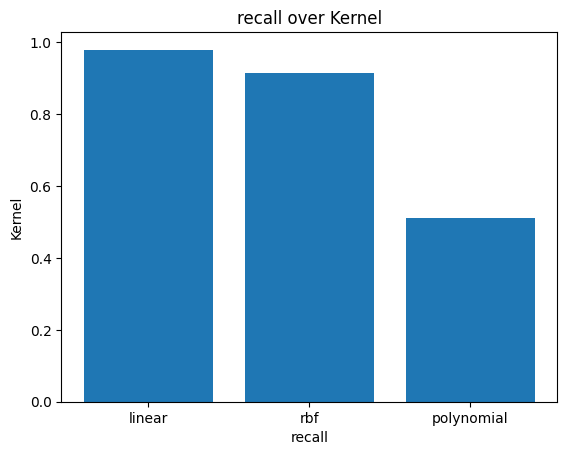

In [15]:
# Plotting recall over different kernels
kernels = ['linear', 'rbf', 'polynomial']
recalls = [metrics.recall_score(Y_test, Y_pred_lin), metrics.recall_score(Y_test, Y_pred_rbf), metrics.recall_score(Y_test, Y_pred_poly)]

# Create a bar plot
plt.bar(kernels, recalls)

# Add labels and title
plt.xlabel('recall')
plt.ylabel('Kernel')
plt.title('recall over Kernel')

# Show the plot
plt.show()

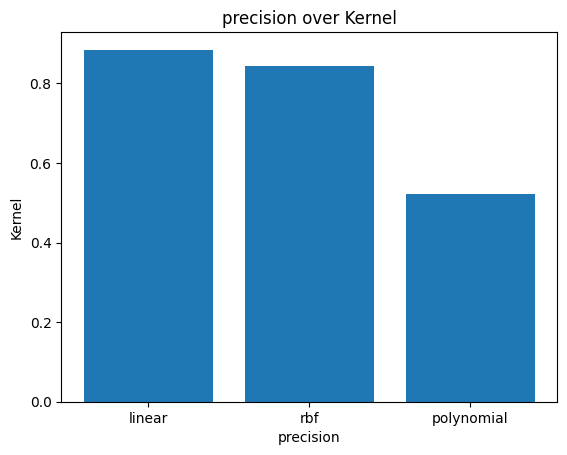

In [18]:
# Plotting recall over different kernels
kernels = ['linear', 'rbf', 'polynomial']
precisions = [metrics.precision_score(Y_test, Y_pred_lin), metrics.precision_score(Y_test, Y_pred_rbf), metrics.precision_score(Y_test, Y_pred_poly)]

# Create a bar plot
plt.bar(kernels, precisions)

# Add labels and title
plt.xlabel('precision')
plt.ylabel('Kernel')
plt.title('precision over Kernel')

# Show the plot
plt.show()